# Introducción a Keras: Implementando una RNA para clasificación

## Pasos en la implementación de una Red Neuronal Artificial en Keras

1. Define tu conjunto de datos de entrenamiento: vectores de entrada y de salida
2. Define la arquitectura de la Red Neuronal Artificial
3. Configura el proceso de aprendizaje mediante la selección de una función de error, una función de optimización y diferentes metricas para monitorizar el proceso
4. Entrena la RNA con tu conjunto de datos de entrenamiento mediante el uso del método **fit()**

## 0. Imports

Lo primero que debe hacerse es importar las librerías especificas necesarias para la implementación de la Red Neuronal Artificial: En las nuevas versiones de TensorFlow y Keras, la recomendación es utilizar Keras a través del framework TensorFlow

In [1]:
import tensorflow as tf

tf.__version__

'2.6.0'

In [2]:
from tensorflow import keras

keras.__version__

'2.6.0'

## 1. Difinicion del conjunto de datos de entrenamiento

### 1.1. importando el conjunto de datos

Keras nos proporciona algunos conjuntos de datos de prueba que podemos utilizar para la realización de pruebas.

In [3]:
from tensorflow.keras import datasets

Podemos utilizar tab sobre 'datasets' para visualizar los conjuntos de datos disponibles. En este caso vamos a importar el conjunto de datos MNIST.

In [4]:
mnist = datasets.mnist

Podemos utilizar shift + tab sobre 'load_data()' para visualizar el input y output del método.

In [5]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 3s 0us/step


El conjunto de datos importado está formado por un total de 70000 imagenes divididas en dos conjuntos de datos, el conjunto de datos de entrenamiento X_train (60000 imagenes) y el conjunto de datos de pruebas (10000 imágenes).

In [6]:
X_train.shape

(60000, 28, 28)

In [7]:
X_test.shape

(10000, 28, 28)

Las etiquetas se corresponden con el valor númerico que representa la imágen.

In [8]:
y_train.shape

(60000,)

In [9]:
y_train[0]

5

### 1.2. Visualizando el conjunto de datos

In [10]:
import numpy as np
import matplotlib.pyplot as plt

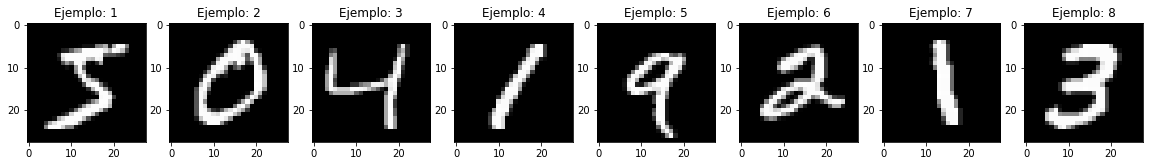

In [11]:
# Visualización de los primeros 8 ejemplos de nuestro conjunto de datos de entrenamiento
plt.figure(figsize=(20, 4))

for index, digit in zip(range(1, 9), X_train[:8]):
    plt.subplot(1, 8, index)
    plt.imshow(np.reshape(digit, (28, 28)), cmap=plt.cm.gray)
    plt.title('Ejemplo: ' + str(index))
plt.show()

### 1.3. División del conjunto de datos

Para la realización de una serie de pruebas adicionales vamos a dividir el conjunto de datos de prueba en dos subconjuntos, el conjunto de validación (X_val) y el conjunto de pruebas(X_test)

In [12]:
from sklearn.model_selection import train_test_split

X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5)

In [13]:
X_test.shape

(5000, 28, 28)

In [14]:
X_val.shape

(5000, 28, 28)

## Definicion de la arquitectura de la Red Neuronal Artificial

Tal como se puede observar en la definición de la Red Neuronal Artificial que se muestra a continuación, el bloque básico que utiliza Keras es la **layer** o capa. La red Neuronal estará formada por diferentes capas que a su vez contendrán un conjunto de neuronas que se corresponden con el primer parámetro que se le proporciona.

In [15]:
from tensorflow.keras import models
from tensorflow.keras import layers

Definimos una Red Neuronal Artificial formada por 3 capas:
  * La primera capa estará formada por 300 neuronas
  * La segunda capa estará formada por 100 neuronas
  * La última capa estará formada por 10 neuronas
    

In [18]:
network = models.Sequential()

#.Dense quiere decir que está densamente conectada, todos los outputs serán los inputs de la siguiente capa
network.add(layers.Dense(300, activation='relu', input_shape=(28*28,)))
network.add(layers.Dense(100, activation='relu'))
network.add(layers.Dense(10, activation='softmax')) # Al tratarse de un problema de clasificación multiclase, recibe 10 neuronas y la funcón de activacion

Una vez hemos definido la arquitectura de la Red Neuronal Profunda podemos visualizarla junto con el número total de parámetros utilizando el método summary()

In [19]:
network.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_4 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


### 2.2 Acceso a los elementos definidos en la RNA

In [20]:
network.layers

En este caso vamos a acceder a los parámetros del modelo que componen las neuronas de la primera hidden layer

In [22]:
hidden1 = network.layers[1]

In [23]:
weights, biases = hidden1.get_weights()

Como puede observarse en las siguientes celdas, Keras automáticamente inicializa el valor de los parámetros de manera aleatoria y los bias term con el valor 0 

In [24]:
weights

array([[ 0.09770898, -0.12081486, -0.02086047, ..., -0.00207085,
        -0.08461903, -0.10887376],
       [ 0.04159763, -0.00303516, -0.01502423, ...,  0.00622118,
         0.1022405 ,  0.01381902],
       [-0.10321121,  0.00336993,  0.01148234, ..., -0.05626994,
        -0.07190801,  0.06766499],
       ...,
       [ 0.01588368,  0.10977317, -0.01394096, ...,  0.11376511,
        -0.02941698,  0.01693299],
       [ 0.03900515, -0.00177482,  0.06106838, ..., -0.04408561,
        -0.08472912, -0.10556649],
       [-0.05078004, -0.11456544,  0.08349424, ...,  0.10776991,
         0.11201977, -0.04777312]], dtype=float32)

In [25]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)

## 3. Configuración de la Red Neuronal Artificial

Para que la Red Neuronal Artificial funcione adecuadamente va a requerir tres componentes adicionales que se seleccionan durante el proceso de compilación:

   1. **La función de error**. Se utiliza en el proceso de optimización de los parámetros del modelo, para medir el error producido al modificar el valor de los parámetros del modelo en una dirección determinada
   2. **La función de optimización:** Se corresponde con la función encargada de actualizar el valor de los parámetros del modelo en una dirección
   3. **Metricas para monitorizar el proceso de entrenamiento:** Es interesante utilizar utiliza un conjunto de metricas durante el entrenamiento de la Red Neuronal Artificial de manera que podamos saber en cada iteración si el valor de los parámetros del modelo es adecuado o se están produciendo problemas como overfitting

In [26]:
network.compile(
    loss='categorical_crossentropy',
    optimizer='sgd',
    metrics=['accuracy', 'Precision']
)

## 4. Preparación del conjunto de datos

Debido a la forma en la que hemos definido la arquitectura de nuestra Red Neuronal Artificial y los parámetros de compilación, vamos a requerir realizar algunas transformaciones sobre nuestro conjunto de datos

### 4.1. Preparación de las características de entrada

In [27]:
X_train_prep = X_train.reshape((60000, 28*28))
X_train_prep = X_train_prep.astype('float32') / 255

X_test_prep = X_test.reshape((5000, 28*28))
X_test_prep = X_test_prep.astype('float32') / 255

X_val_prep = X_val.reshape((5000, 28*28))
X_val_prep = X_val_prep.astype('float32') / 255


In [30]:
print(X_train[0].shape)
print(X_train.shape)

(28, 28)
(60000, 28, 28)


In [31]:
print(X_train_prep[0].shape)
print(X_train_prep.shape)

(784,)
(60000, 784)


### 4.2 Preparación de las características de salida (etiquetas)

In [32]:
from tensorflow.keras.utils import to_categorical

y_train_prep = to_categorical(y_train)
y_test_prep = to_categorical(y_test)
y_val_prep = to_categorical(y_val)

In [33]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [38]:
y_train_prep

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [41]:
print(X_val_prep.shape)
print(y_val_prep.shape)

(5000, 784)
(5000, 10)


In [42]:
print(X_train_prep.shape)
print(y_train_prep.shape)

(60000, 784)
(60000, 10)


In [43]:
print(X_test_prep.shape)
print(y_test_prep.shape)

(5000, 784)
(5000, 10)


## 5. Entrenamiento de la Red Neuronal Artificial

En este putno ya estamos listos para entrenar nuestra Red Neuronal Artificial invocando el método fit(). Una de las capacidades que nos proporciona Keras es la de integrar el proceso de validación en el propio proceso de entrenamiento, para ello, junto con el subconjunto de datos de entrenamiento, debemos proporcionarle en este método el subconjunto de validación.

In [44]:
history = network.fit(
                        X_train_prep,
                        y_train_prep,
                        epochs=30,
                        validation_data=(X_val_prep, y_val_prep)
)

Epoch 1/30
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5874 - accuracy: 0.8471 - precision: 0.9415 - val_loss: 0.3109 - val_accuracy: 0.9122 - val_precision: 0.9414
Epoch 2/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2806 - accuracy: 0.9191 - precision: 0.9435 - val_loss: 0.2425 - val_accuracy: 0.9314 - val_precision: 0.9515
Epoch 3/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2274 - accuracy: 0.9348 - precision: 0.9528 - val_loss: 0.2097 - val_accuracy: 0.9396 - val_precision: 0.9556
Epoch 4/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1925 - accuracy: 0.9449 - precision: 0.9594 - val_loss: 0.1827 - val_accuracy: 0.9466 - val_precision: 0.9598
Epoch 5/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1671 - accuracy: 0.9515 - precision: 0.9641 - val_loss: 0.1664 - val_accuracy: 0.9484 - val_precision: 0.9620
Epoch 6/30
1875/1875 [==============================] - 4s 2

En la variable **history** se almacenan varios valores importantes:

   * El valor de los parámetros del modelo después del entrenamiento
   * La lista Epochs llevados a cabo
   * Un diccionario con el error producido en cada epoch en el conjunto de datos de entrenamiento y validación

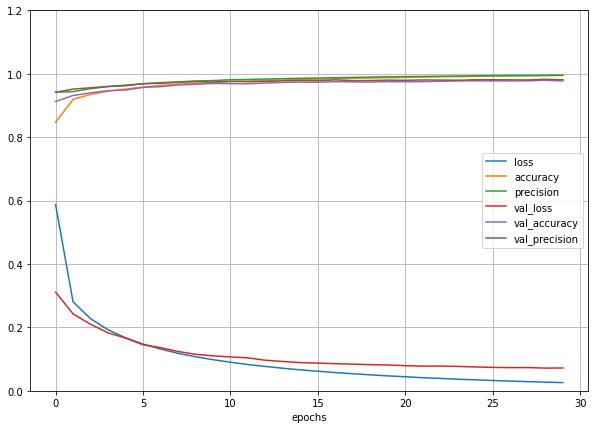

In [46]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(10, 7))
plt.grid(True)
plt.gca().set_ylim(0, 1.2)
plt.xlabel('epochs')
plt.show()

Debido a que en la gráfica anterior se observa que el error en el conjunto de datos de validación sigue disminuyendo, podemos continuar entrenando el algoritmo invocando de nuevo el método fit(), Keras continuará el entrenamiento en el que lo dejo.

In [47]:
history = network.fit(
                        X_train_prep,
                        y_train_prep,
                        epochs=10,
                        validation_data=(X_val_prep, y_val_prep)
)

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0242 - accuracy: 0.9949 - precision: 0.9959 - val_loss: 0.0730 - val_accuracy: 0.9774 - val_precision: 0.9801
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0231 - accuracy: 0.9950 - precision: 0.9960 - val_loss: 0.0737 - val_accuracy: 0.9780 - val_precision: 0.9807
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0217 - accuracy: 0.9954 - precision: 0.9965 - val_loss: 0.0741 - val_accuracy: 0.9774 - val_precision: 0.9795
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0203 - accuracy: 0.9958 - precision: 0.9969 - val_loss: 0.0731 - val_accuracy: 0.9782 - val_precision: 0.9813
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0193 - accuracy: 0.9963 - precision: 0.9972 - val_loss: 0.0721 - val_accuracy: 0.9776 - val_precision: 0.9807
Epoch 6/10
1875/1875 [==============================] - 5s 3

## 6. Validación con el conjunto de datos de pruebas

In [49]:
test_loss, test_acc, test_prec = network.evaluate(X_test_prep, y_test_prep)

157/157 [==============================] - 0s 2ms/step - loss: 0.0665 - accuracy: 0.9808 - precision: 0.9827


In [50]:
print('test_acc: ', test_acc)
print('test_prec: ', test_prec)

test_acc:  0.9807999730110168
test_prec:  0.9827309250831604


## 7. Predicción de nuevos ejemplos

In [51]:
# Suponemos que X_new es un nuevo ejemplo que el algoritmo no ha visto nunca
X_new = X_test[34]

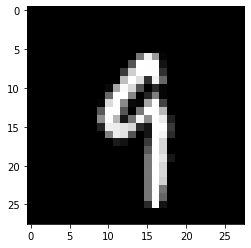

In [52]:
# Representación grafica del nuevo ejemplo que queremos predecir 
plt.imshow(np.reshape(X_new, (28, 28)), cmap=plt.cm.gray)
plt.show()

In [54]:
# Preprocesamos la nueva imagen que queremos predecir
X_new_prep = X_new.reshape((1, 28*28))
X_new_prep = X_new_prep.astype('float32') / 255

In [55]:
# Realizamos la predicción
y_proba = network.predict(X_new_prep)

In [57]:
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.03, 0.  , 0.  , 0.  , 0.  , 0.97]],
      dtype=float32)

In [58]:
# Realizamos la predicción obteniendo una clase en lugar de una probabilidad
np.argmax(network.predict(X_new_prep), axis=1)

array([9], dtype=int64)

Es importante saber que el método tradicional predict_classes va a ser deprecado proximamente

## 8. Guardar el modelo en disco

Con Keras generalmente la arquitectura de la red neuronal, la entrenamos y después evaluamos. Existen diferentes alternativas a la hora exportar el modelo entrenado (https://keras.io/guides/serialization_and_saving/), en este caso se expone una de las más utilizadas.

De la forma que se indica a continuación, vamos a exportar en un fichero los siguientes componentes de la red neuronal:
    
   * La arquitectura del modelo
   * Los parámetros del modelo
   * Los hiperparámetros del modelo
   * Las métricas

In [59]:
# Guardamos el modelo en disco
network.save('modelo_mnist')

INFO:tensorflow:Assets written to: modelo_mnist\assets


Una vez ejecutada la celda anterior, generará un fichero modelo_mnist que puede utilizarse para transportarlo a otro sistema y predecir con nuevos ejemplos. La forma en la que puedes importar este fichero para predecir nuevos ejemplos es la siguiente:

In [61]:
# Importamos las librerías necesarias
from tensorflow.keras.models import load_model

# Cargamos el modelo del disco 
mnist_model = load_model('modelo_mnist')

#Realizamos una nueva predicción
y_pred = np.argmax(mnist_model.predict(X_new_prep), axis=1)

In [62]:
y_pred

array([9], dtype=int64)